### Check WRs in ERA5 in spring (1940-2023)

Trend in dynamical response?

In [1]:
import xarray as xr
import climtools_lib as ctl
import matplotlib.pyplot as plt
import numpy as np
import climdiags as cd

libgfortran.so.3: cannot open shared object file: No such file or directory
No DISPLAY variable set. Switching to agg backend


In [10]:
cart = '/home/fabiano/Research/lavori/WeatherRegimes/ERA5_40-23/'
resu, _ = ctl.load_wrtool(cart + 'out_ERA5_40-23_MAM_EAT_4clus_4pcs_1940-2023.p')

resu = resu['ERA5']

In [13]:
resu.keys()

dict_keys(['var_ratio', 'freq_clus', 'cluspattern', 'cluspattern_area', 'lat', 'lat_area', 'lon', 'lon_area', 'labels', 'centroids', 'dist_centroid', 'pcs', 'climate_mean', 'climate_mean_dates', 'eff_centroids', 'eofs_ref_pcs', 'model_eofs', 'model_eofs_eigenvalues', 'model_eofs_varfrac', 'resid_times', 'trans_matrix', 'dates', 'regime_transition_pcs', 'var_area', 'var_glob', 'solver', 'dates_allyear', 'time_cal', 'time_units', 'freq_clus_monthly', 'freq_clus_monthly_dates', 'freq_clus_seasonal', 'freq_clus_seasonal_years'])

In [12]:
%matplotlib inline

12256557.833439022
Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point



[<Figure size 1080x864 with 5 Axes>]

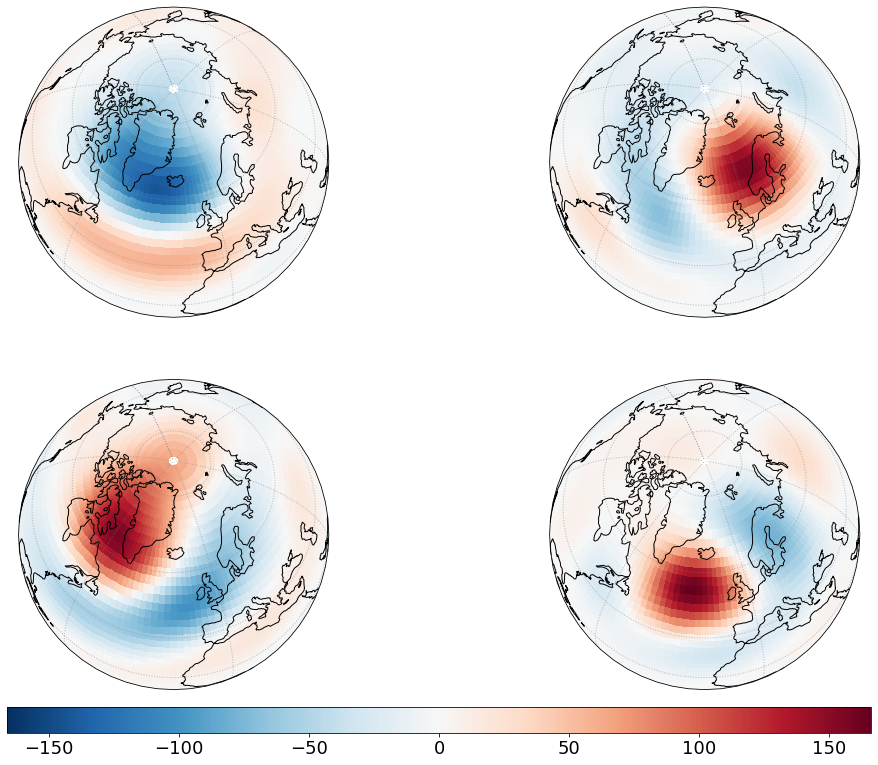

In [25]:
ctl.plot_multimap_contour(resu['cluspattern'], resu['lat'], resu['lon'], visualization = 'nearside', central_lat_lon = (70, -20), bounding_lat= 0, plot_type= 'pcolormesh', plot_anomalies=True)

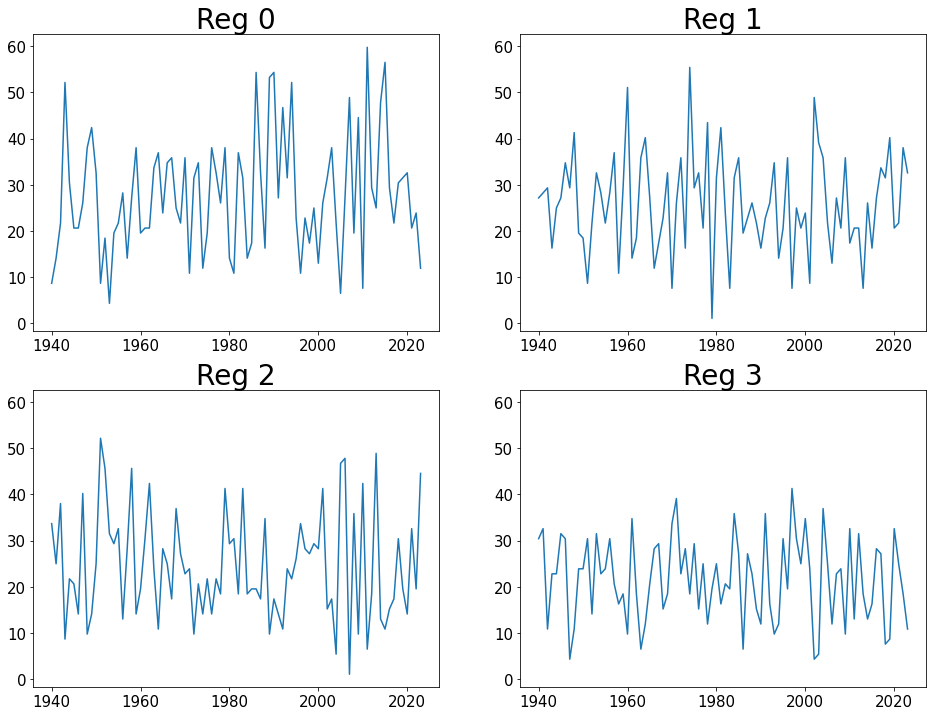

In [17]:
fig, axs = plt.subplots(2,2, figsize = (16,12))

for ax, reg in zip(axs.flatten(), np.arange(4)):
    ax.plot(resu['freq_clus_seasonal_years'], resu['freq_clus_seasonal'][reg])
    ax.set_title('Reg {}'.format(reg))

ctl.adjust_ax_scale(axs.flatten())

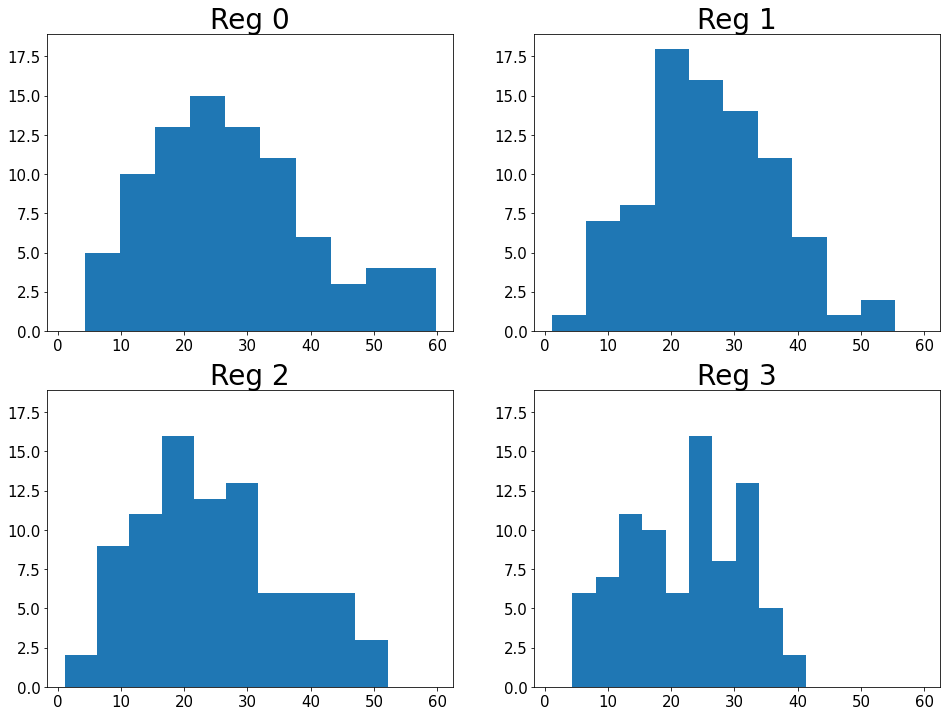

In [18]:
fig, axs = plt.subplots(2,2, figsize = (16,12))

for ax, reg in zip(axs.flatten(), np.arange(4)):
    ax.hist(resu['freq_clus_seasonal'][reg])
    ax.set_title('Reg {}'.format(reg))

ctl.adjust_ax_scale(axs.flatten())

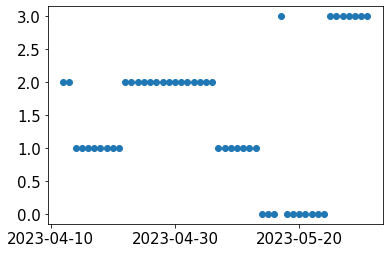

In [30]:
plt.plot_date(resu['dates'][-50:], resu['labels'][-50:])